# K fold-Cross-Validation

### Even though we use k-fold cross validation, our model still may mess up when it comes to real prediction.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import preprocessing

In [3]:
titanic=pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
np.random.seed(1234)#no sense
train,test=train_test_split(titanic,test_size=.2)
mean1=train['Age'].mean()
mean2=test['Age'].mean()
train['Age']=train['Age'].fillna(mean1)
test['Age']=test['Age'].fillna(mean2)

In [8]:
def prep_titanic_data(data_df):
    df=data_df.copy()
    le=preprocessing.LabelEncoder()
    df['Sex']=le.fit_transform(df['Sex'])
    df=df.drop(['Name','Cabin','Embarked','PassengerId','Ticket'],axis=1)
    X=df.drop(['Survived'],axis=1).values
    y=df['Survived'].values##get an array
    return (X,y)

In [9]:
X_train,y_train=prep_titanic_data(train)

In [10]:
X_test,y_test=prep_titanic_data(test)

In [11]:
X_train,y_train

(array([[  3.        ,   1.        ,  12.        ,   1.        ,
           0.        ,  11.2417    ],
        [  1.        ,   1.        ,   0.92      ,   1.        ,
           2.        , 151.55      ],
        [  3.        ,   1.        ,  51.        ,   0.        ,
           0.        ,   7.0542    ],
        ...,
        [  3.        ,   1.        ,  24.        ,   0.        ,
           0.        ,   7.8958    ],
        [  2.        ,   1.        ,  50.        ,   0.        ,
           0.        ,  13.        ],
        [  1.        ,   1.        ,  29.54525394,   0.        ,
           0.        ,   0.        ]]),
 array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 

In [12]:
X_test,y_test

(array([[ 1.       ,  0.       , 44.       ,  0.       ,  1.       ,
         57.9792   ],
        [ 3.       ,  1.       , 30.3134965,  0.       ,  0.       ,
          7.7375   ],
        [ 3.       ,  1.       , 30.3134965,  0.       ,  0.       ,
         14.5      ],
        ...,
        [ 3.       ,  1.       , 51.       ,  0.       ,  0.       ,
          8.05     ],
        [ 3.       ,  1.       , 30.3134965,  0.       ,  0.       ,
         14.4583   ],
        [ 2.       ,  1.       , 34.       ,  1.       ,  0.       ,
         26.       ]]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0

## K-fold Cross-Validation

The intuition behind the k-fold Cross-validation is that we take 20% sample of all the data,and train our models on this data.

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

#use Tree models
# it is impossible to calculate the score if null exists in dataset
T=tree.DecisionTreeClassifier(max_depth=3)
cv_scores=cross_val_score(T,X_train,y_train,cv=5)
cv_scores

array([0.8041958 , 0.76223776, 0.76760563, 0.82394366, 0.81690141])

In [ ]:
# we use mean to calculate the 

### To calculate the best score of the training model

In [22]:
best_score=-np.inf

In [23]:
N=30
scores=np.zeros(N)
##numpy creats array
scores[0]

0.0

In [25]:

for d in range(1,N+1):
    T=tree.DecisionTreeClassifier(max_depth=d)
    scores[d-1]=cross_val_score(T,X_train,y_train,cv=5).mean()
    if scores[d-1]>best_score:
        best_depth=d
        best_score=scores[d-1]
best_depth, best_score

(9, 0.8047966118388654)

For this we can conclude, the best_depth is 9, and the score of modeling is 0.80.

# PLOT THE RESULT

[Text(0.5, 1.0, 'Best Depth9')]

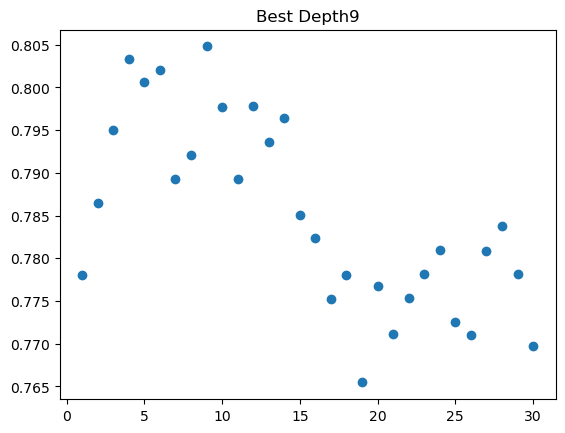

In [27]:
fig,ax=plt.subplots(1)
ax.scatter(np.arange(1,N+1),scores)
ax.set(title='Best Depth'+str(best_depth))